In [1]:
import numpy as np
import pyrtools
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def show(gray_img):
    plt.imshow(gray_img, cmap='gray')

In [3]:
img = Image.open('./einsteinCorrect.pgm')
img = np.asarray(img)

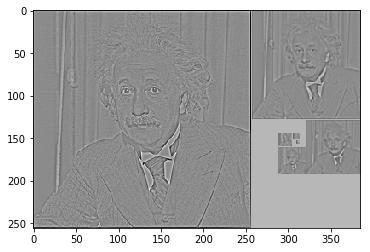

In [4]:
lpyr = pyrtools.Lpyr(img)
lpyr.showPyr()

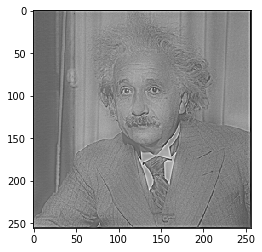

In [5]:
lpyr_recon = lpyr.reconPyr([0, 3, 5])
show(lpyr_recon)

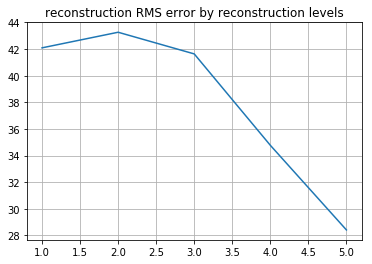

In [6]:
def norm_img(img, dmin=0, dmax=255):
    vmax = np.max(img)
    vmin = np.min(img)
    return (img - vmin + dmin) / (vmax - vmin) * dmax


recon_error = [
    np.sqrt(np.mean(
        (img - norm_img(lpyr.reconPyr(range(level)), img.min(), img.max())) ** 2
    )) for level in range(1, 6)
]

plt.plot(range(1, 6), recon_error)
plt.title("reconstruction RMS error by reconstruction levels")
plt.grid()
plt.show()

In [7]:
spyr = pyrtools.Spyr(img, 4, 'sp3Filters')

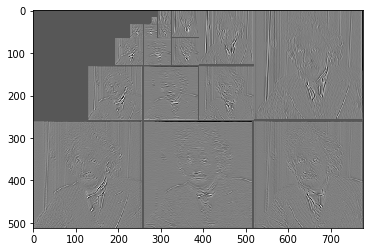

In [8]:
spyr.showPyr()

In [9]:
wpyr = pyrtools.Wpyr(img)

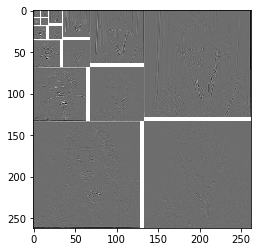

In [10]:
wpyr.showPyr()

In [11]:
sfpyr = pyrtools.SFpyr(img)

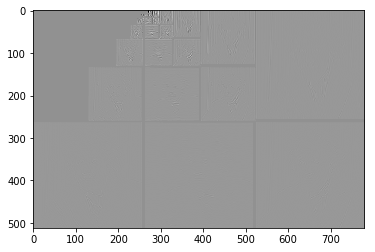

In [12]:
sfpyr.showPyr()